<a href="https://colab.research.google.com/github/carlosmvond/modelos_predictivos/blob/main/ClaseMP_15octubre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

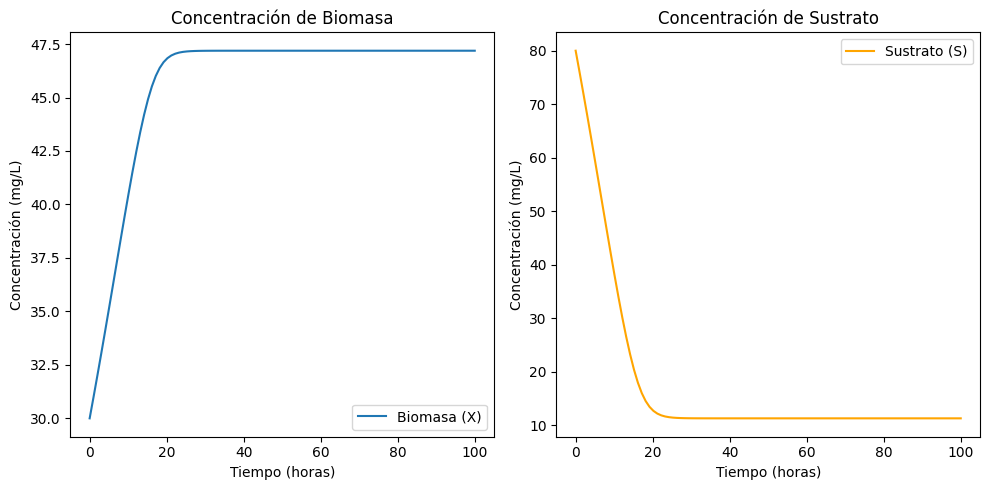

numpy.ndarray

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parámetros
D = 0.1  # Tasa de dilución (1/horas)
S_in = 200  # Concentración de sustrato entrante (mg/L)
Y = 0.25  # Rendimiento celular

# P. aeruginosa
mu_max = 0.14  # Tasa máxima de crecimiento (1/horas)
K_s = 4.5  # Constante de saturación de Monod (mg/L)

# Función que define las ecuaciones del modelo
def model(y, t):
    X, S = y
    mu = mu_max * S / (K_s + S)  # Tasa de crecimiento
    dXdt = X * (mu - D)           # Ecuación de crecimiento celular
    dSdt = D * (S_in - S) - mu * X / Y  # Ecuación de sustrato
    return [dXdt, dSdt]

# Condiciones iniciales
X0 = 30  # Concentración inicial de biomasa (mg/L)
S0 = 80  # Concentración inicial de sustrato (mg/L)
y0 = [X0, S0]

# Tiempo de simulación (horas)
t = np.linspace(0, 100, 100)  # 50 horas, 100 puntos

# Resolver el sistema de ecuaciones
result = odeint(model, y0, t)

# Extraer los resultados
X, S = result.T

# Graficar los resultados
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(t, X, label='Biomasa (X)')
plt.xlabel('Tiempo (horas)')
plt.ylabel('Concentración (mg/L)')
plt.title('Concentración de Biomasa')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(t, S, label='Sustrato (S)', color='orange')
plt.xlabel('Tiempo (horas)')
plt.ylabel('Concentración (mg/L)')
plt.title('Concentración de Sustrato')
plt.legend()

plt.tight_layout()
plt.show()

type(result)

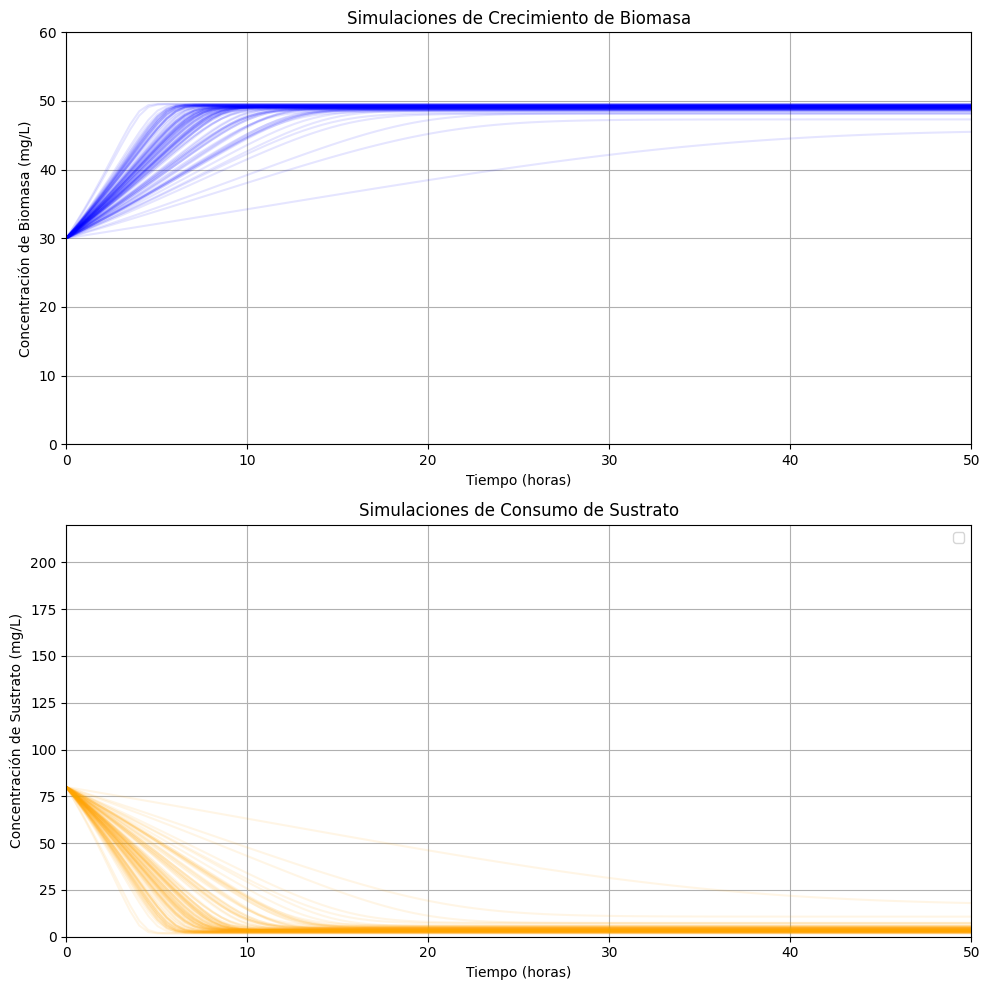

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint



# Parámetros fijos
D = 0.06  # Tasa de dilución (1/horas)
S_in = 200  # Concentración de sustrato entrante (mg/L)
Y = 0.25  # Rendimiento celular

# Configuración de las simulaciones
num_simulations = 100  # Número de simulaciones

# Condiciones iniciales
X0 = 30  # Concentración inicial de biomasa (mg/L)
S0 = 80  # Concentración inicial de sustrato (mg/L)
y0 = [X0, S0]

# Configuración de las simulaciones
num_simulations = 100  # Número de simulaciones

# Tiempo de simulación (horas)
t = np.linspace(0, 50, 100)  # 50 horas, 100 puntos

# Inicializar la figura
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Realizar simulaciones
for _ in range(num_simulations):
    # Generar valores aleatorios para mu_max y K_s usando distribuciones normales
    mu_max = np.random.normal(loc=0.14, scale=0.02)  # Media = 0.14, Desviación estándar = 0.02
    K_s = np.random.normal(loc=4.5, scale=0.5)        # Media = 4.5, Desviación estándar = 1.0

    # Resolver el sistema de ecuaciones
    result = odeint(model, y0, t)

    # Extraer las concentraciones de biomasa y sustrato
    X = result[:, 0]
    S = result[:, 1]

    # Graficar la concentración de biomasa y sustrato en subgráficas
    ax1.plot(t, X, color='blue', alpha=0.1)  # Biomasa
    ax2.plot(t, S, color='orange', alpha=0.1)  # Sustrato

# Configurar la gráfica de biomasa
ax1.set_xlabel('Tiempo (horas)')
ax1.set_ylabel('Concentración de Biomasa (mg/L)')
ax1.set_title('Simulaciones de Crecimiento de Biomasa')
ax1.set_xlim(0, 50)
ax1.set_ylim(0, max(X0 * 2, 50))  # Ajustar el límite superior
ax1.grid()

# Configurar la gráfica de sustrato
ax2.set_xlabel('Tiempo (horas)')
ax2.set_ylabel('Concentración de Sustrato (mg/L)')
ax2.set_title('Simulaciones de Consumo de Sustrato')
ax2.set_xlim(0, 50)
ax2.set_ylim(0, S_in * 1.1)  # Ajustar límite superior
ax2.legend()
ax2.grid()

plt.tight_layout()
plt.show()



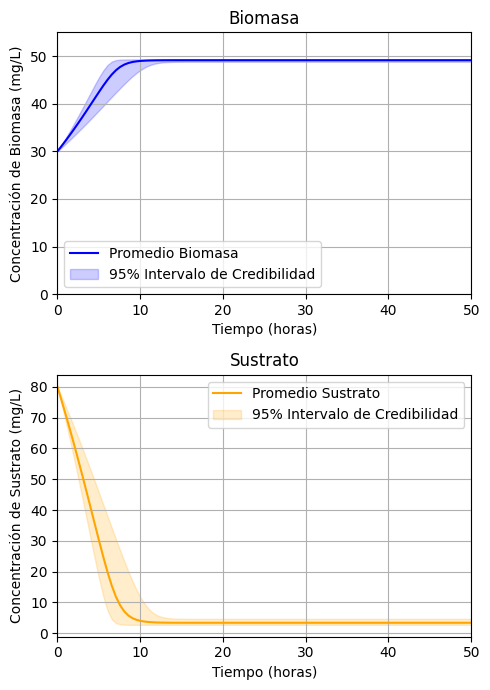

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


# Tiempo de simulación (horas)
t = np.linspace(0, 50, 100)  # 50 horas, 100 puntos

# Inicializar matrices para almacenar resultados
X_results = np.zeros((num_simulations, len(t)))
S_results = np.zeros((num_simulations, len(t)))

# Realizar simulaciones
for i in range(num_simulations):
    # Generar valores aleatorios para mu_max y K_s usando distribuciones normales
    mu_max = np.random.normal(loc=0.14, scale=0.01)  # Media = 0.14, Desviación estándar = 0.02
    K_s = np.random.normal(loc=4.5, scale=0.1)        # Media = 4.5, Desviación estándar = 0.5

    # Resolver el sistema de ecuaciones
    result = odeint(model, y0, t)

    # Almacenar los resultados en matrices
    X_results[i, :] = result[:, 0]
    S_results[i, :] = result[:, 1]

# Calcular el promedio y los intervalos de credibilidad del 95% para biomasa y sustrato
X_mean = np.mean(X_results, axis=0)
X_lower = np.percentile(X_results, 2.5, axis=0)
X_upper = np.percentile(X_results, 97.5, axis=0)

S_mean = np.mean(S_results, axis=0)
S_lower = np.percentile(S_results, 2.5, axis=0)
S_upper = np.percentile(S_results, 97.5, axis=0)
# Graficar los resultados

# Inicializar la figura
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 7))

# Graficar el promedio y los intervalos de credibilidad para biomasa
ax1.plot(t, X_mean, color='blue', label='Promedio Biomasa')
ax1.fill_between(t, X_lower, X_upper, color='blue', alpha=0.2, label='95% Intervalo de Credibilidad')
ax1.set_xlabel('Tiempo (horas)')
ax1.set_ylabel('Concentración de Biomasa (mg/L)')
ax1.set_title('Biomasa')
ax1.set_xlim(0, 50)
ax1.set_ylim(0, 55)  # Límite inferior y superior del eje y
ax1.grid()
ax1.legend()

# Graficar el promedio y los intervalos de credibilidad para sustrato
ax2.plot(t, S_mean, color='orange', label='Promedio Sustrato')
ax2.fill_between(t, S_lower, S_upper, color='orange', alpha=0.2, label='95% Intervalo de Credibilidad')
ax2.set_xlabel('Tiempo (horas)')
ax2.set_ylabel('Concentración de Sustrato (mg/L)')
ax2.set_title('Sustrato')
ax2.set_xlim(0, 50)
ax1.set_ylim(0, 55)  # Límite inferior y superior del eje y
ax2.legend()
ax2.grid()

plt.tight_layout()
plt.show()
